In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 6, 4)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001
2020-04-07,271.700012,259.000000,270.799988,259.429993,50721800.0,259.429993
2020-04-08,267.369995,261.230011,262.739990,266.070007,42223800.0,266.070007
2020-04-09,270.070007,264.700012,268.700012,267.989990,40529100.0,267.989990


In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [4]:
mavg

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2020-04-03    284.345471
2020-04-06    284.354379
2020-04-07    284.335282
2020-04-08    284.357544
2020-04-09    284.417262
Name: Adj Close, Length: 2585, dtype: float64

In [5]:
mavg.tail()

Date
2020-04-03    284.345471
2020-04-06    284.354379
2020-04-07    284.335282
2020-04-08    284.357544
2020-04-09    284.417262
Name: Adj Close, dtype: float64

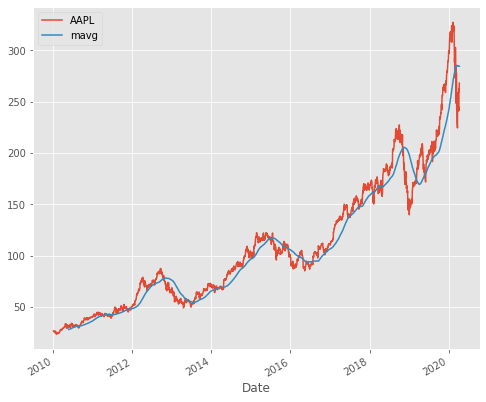

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

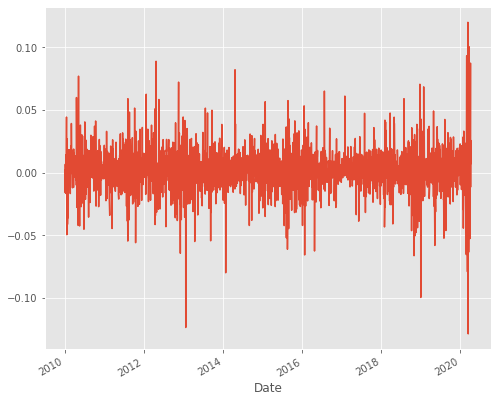

In [7]:
 rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [8]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

In [9]:
dfcomp

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2010-01-04,26.538483,10.749147,312.204773,95.994934,24.294369
2010-01-05,26.584366,10.804806,310.829926,94.835304,24.302216
2010-01-06,26.161509,10.749147,302.994293,94.219246,24.153070
2010-01-07,26.113146,11.305734,295.940735,93.893105,23.901886
2010-01-08,26.286753,11.549245,299.885956,94.835304,24.066734
...,...,...,...,...,...
2020-04-03,241.410004,6.730000,1097.880005,106.339996,153.830002
2020-04-06,262.470001,7.230000,1186.920044,114.820000,165.270004
2020-04-07,259.429993,7.030000,1186.510010,114.940002,163.490005


In [10]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()

In [11]:
corr

Symbols,AAPL,GE,GOOG,IBM,MSFT
Symbols,,,,,
AAPL,1.000000,0.407743,0.525755,0.463854,0.538881
GE,0.407743,1.000000,0.403114,0.504272,0.447698
GOOG,0.525755,0.403114,1.000000,0.471837,0.596846
IBM,0.463854,0.504272,0.471837,1.000000,0.558109
MSFT,0.538881,0.447698,0.596846,0.558109,1.000000


In [12]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel(‘Returns AAPL’)
plt.ylabel(‘Returns GE’)

SyntaxError: invalid character in identifier (<ipython-input-12-b71282474807>, line 2)

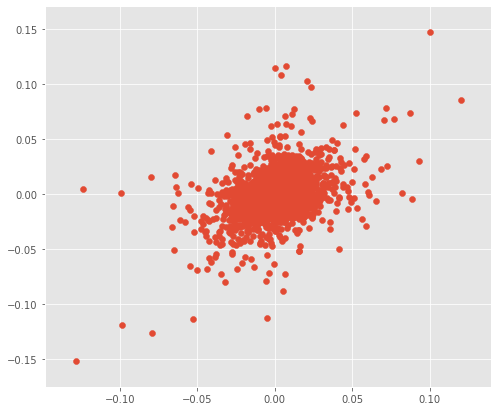

In [17]:
plt.scatter(retscomp.AAPL, retscomp.GE)

In [14]:
plt.xlabel(‘Returns AAPL’)

SyntaxError: invalid character in identifier (<ipython-input-14-cefe850ab049>, line 1)

Text(0.5, 0, 'Returns AAPL')

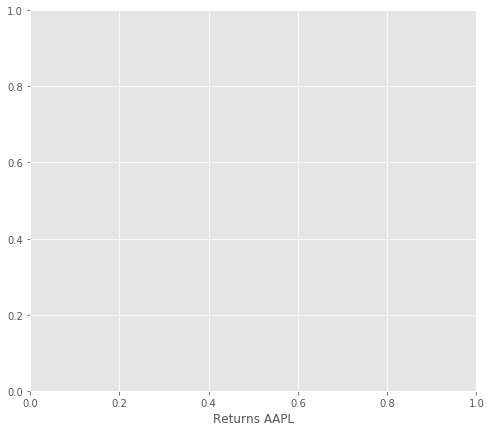

In [15]:
plt.xlabel("Returns AAPL")

Text(0, 0.5, 'Returns GE')

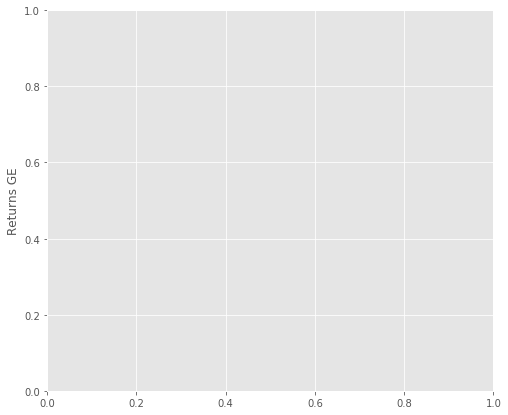

In [16]:
plt.ylabel("Returns GE")

Text(0, 0.5, 'Returns GE')

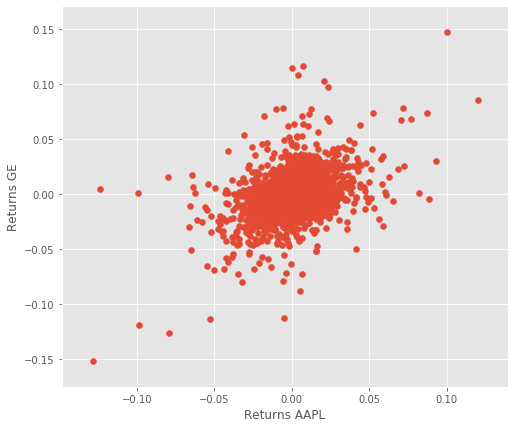

In [18]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel("Returns AAPL")
plt.ylabel("Returns GE")

In [20]:
pd.scatter_matrix(retscomp, diagonal="kde", figsize=(10, 10))

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

In [21]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C3AD03DA0>,
      dtype=object)

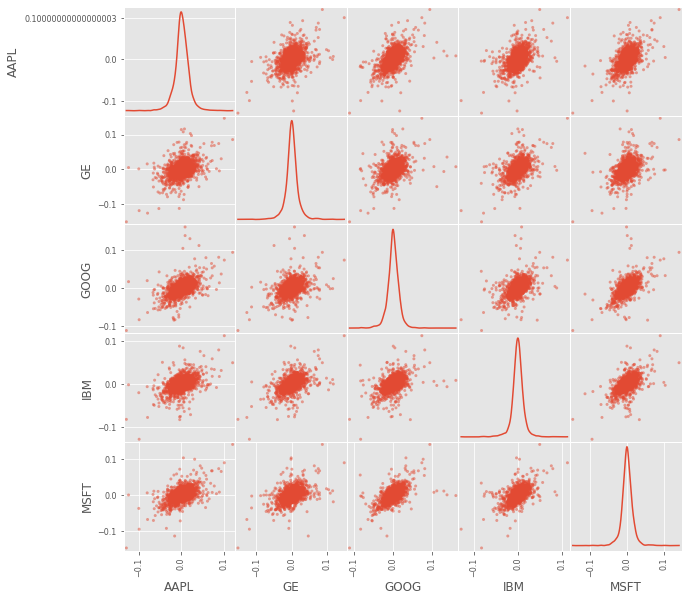

In [23]:
scatter_matrix(retscomp, diagonal="kde", figsize=(10, 10))

In [24]:
pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C3E2D6D30>,
      dtype=object)

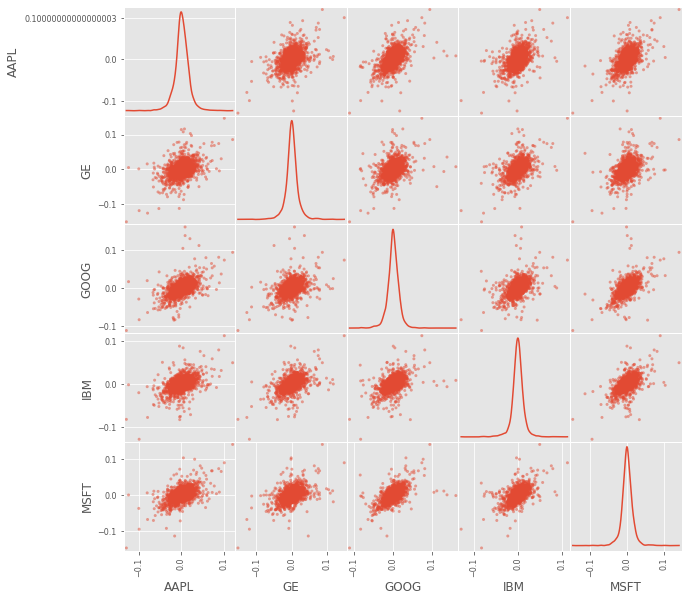

In [25]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))

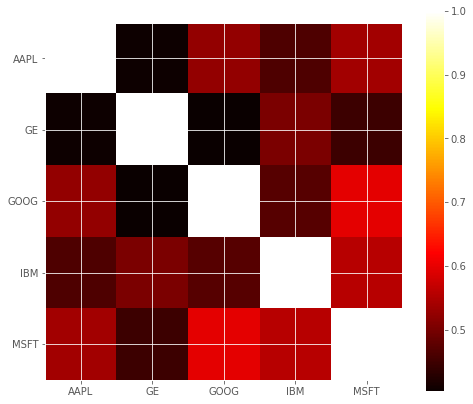

In [26]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

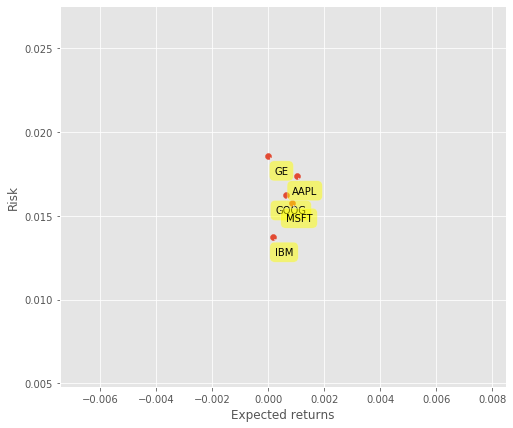

In [27]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))